# Dietary Model Examples

This notebook demonstrates how to use the dietary classification library to:

- Define a hierarchy of food categories
- Register and classify dietary restrictions using canonical tags
- Create ingredients and meals
- Define people with tagged or custom restrictions
- Analyze meal compatibility
- Score and filter meals
- Explore tags by category

First, let's import the dietary_model library, along with a few extras that we'll use for visualization later on.

In [1]:
# from mealplanner.dietary_model import *
# from mealplanner.natural_language_parsing import *
# from mealplanner.defaults import *
# from mealplanner.guest_list_analyzer import *

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 1. Define Food Categories and Tags

### Food Categories

Food categories support hierarchy. For example, CHEESE is a type of DAIRY, which is a type of ANIMAL_PRODUCTS.
These relationships allow general restrictions (like "no ANIMAL_PRODUCTS") to apply to all children.

To get the best use out of this library, hierarchial configuration is **strongly** advised.

This library is designed to work throughout cultures, traditions, and culinary doctines. While a default set of food categories is provided, users are encouraged to add/define categories and tags as they see fit. An example of that is shown here:

In [2]:
from mealplanner.dietary_model import FoodCategory

In [3]:
FoodCategory.reset()
FoodCategory.define("ANIMAL_PRODUCTS")
FoodCategory.define("MEAT", {"ANIMAL_PRODUCTS"})
FoodCategory.define("DAIRY", {"ANIMAL_PRODUCTS"})
FoodCategory.define("FISH", {"ANIMAL_PRODUCTS"})
FoodCategory.define("SHELLFISH", {"ANIMAL_PRODUCTS"})
FoodCategory.define("NUTS")
FoodCategory.define("CHEESE", {"DAIRY"})
FoodCategory.define("SALMON", {"FISH"})
FoodCategory.define("CHICKEN", {"MEAT"})
FoodCategory.define("ALMOND", {"NUTS"})
FoodCategory.define("TOFU")

FoodCategory(TOFU)

### Register Canonical Tags

Tags are registered with associated restrictions and optional category labels (e.g. "ethical", "allergen").
This allows for flexible tagging of people and meals.

In [4]:
from mealplanner.dietary_model import tag_registry, DietaryRestriction

In [5]:
tag_registry.clear()
tag_registry.register_tag("VEGAN", DietaryRestriction({"ANIMAL_PRODUCTS"}), category="ethical")
tag_registry.register_tag("VEGETARIAN", DietaryRestriction({"MEAT", "FISH", "SHELLFISH"}), category="ethical")
tag_registry.register_tag("PESCATARIAN", DietaryRestriction({"MEAT"}), category="ethical")
tag_registry.register_tag("NUT-FREE", DietaryRestriction({"NUTS"}), category="allergen")
tag_registry.register_tag("DAIRY-FREE", DietaryRestriction({"DAIRY"}), category="allergen")

### Default Setup

However, for all examples and tests in this library, we will simply be using the defaults.

In [6]:
from mealplanner.defaults import setup_defaults

# Setup default food categories and tags
setup_defaults()

The `FoodCategory` class itself stores this defined registry of categories globally. 

The `FoodCategory.all()` function displays all registered food categories. Let's take a look at all of the current categories and tags available

In [7]:
# Show all defined categories
print("=== Default Food Categories ===")
for cat in FoodCategory.all():
    print(f"- {cat.name}")

# Show all defined tags
print("\n=== Default Dietary Tags ===")
for tag in tag_registry.all_tags():
    print(f"- {tag}")

=== Default Food Categories ===
- ANIMAL_PRODUCTS
- PLANT_BASED
- MEAT
- DAIRY
- EGGS
- FISH
- SHELLFISH
- BEEF
- CHICKEN
- PORK
- CHEESE
- MILK
- YOGURT
- SALMON
- TUNA
- NUTS
- GRAINS
- LEGUMES
- VEGETABLES
- FRUITS
- ALMOND
- PEANUT
- CASHEW
- WHEAT
- RICE
- OATS
- GLUTEN
- SOY
- TOFU
- CUISINE
- ASIAN
- JAPANESE
- CHINESE
- ITALIAN
- MEXICAN

=== Default Dietary Tags ===
- VEGAN
- VEGETARIAN
- PESCATARIAN
- MEAT-FREE
- NUT-FREE
- DAIRY-FREE
- EGG-FREE
- SHELLFISH-FREE
- FISH-FREE
- BEEF-FREE
- GLUTEN-FREE
- SOY-FREE


## 3. Create Ingredients and Meals

A meal is a list of ingredients. Each ingredient has a category, caloric value, and optional allergens.

In [8]:
from mealplanner.dietary_model import Ingredient, Meal

In [9]:
cheese = Ingredient("Aged Cheddar", FoodCategory.get("CHEESE"), 100)
salmon = Ingredient("Wild Salmon", FoodCategory.get("SALMON"), 180)
almond = Ingredient("Toasted Almonds", FoodCategory.get("ALMOND"), 150)
tofu = Ingredient("Fried Tofu", FoodCategory.get("TOFU"), 130)

meals = [
    Meal("Cheese & Almond Plate", [cheese, almond]),
    Meal("Salmon Bowl", [salmon]),
    Meal("Tofu Delight", [tofu])
]


## 4. Define People and Restrictions

You can define a person either by a known tag (like "VEGAN") or by a custom DietaryRestriction.

In [10]:
from mealplanner.dietary_model import Person

In [11]:
people = [
    Person("Alex", tag="VEGAN"),
    Person("Jamie", tag="PESCATARIAN"),
    Person("Sam", tag="NUT-FREE"),
    Person("Taylor", restriction=DietaryRestriction({"DAIRY", "FISH"}))
]

print("\n=== People and their tags ===")
for p in people:
    print("-", p.label())



=== People and their tags ===
- DietaryRestriction(Excludes: ['ANIMAL_PRODUCTS'])
- DietaryRestriction(Excludes: ['MEAT'])
- DietaryRestriction(Excludes: ['NUTS'])
- DietaryRestriction(Excludes: ['DAIRY', 'FISH'])


## 5. Analyze Meal Compatibility

Use `MealCompatibilityAnalyzer` to evaluate which meals each person can eat, and to generate scores or universal options.

In [12]:
from mealplanner.meal_compatibility_analyzer import MealCompatibilityAnalyzer

In [13]:
analyzer = MealCompatibilityAnalyzer(meals, people)
print("\n=== Compatibility Matrix ===")
analyzer.get_compatibility_matrix(use_emojis=True)


=== Compatibility Matrix ===


,Meal,Alex,Jamie,Sam,Taylor
0,Cheese & Almond Plate,❌,✅,❌,❌
1,Salmon Bowl,❌,✅,✅,❌
2,Tofu Delight,✅,✅,✅,✅


In [14]:
print("\n=== Most Compatible Meals ===")
print(analyzer.get_most_compatible_meals(top_n=2))

print("\n=== Universally Compatible Meals ===")
print(analyzer.get_universally_compatible_meals())


=== Most Compatible Meals ===
           Meal  Compatibility Score
2  Tofu Delight                  1.0
1   Salmon Bowl                  0.5

=== Universally Compatible Meals ===
           Meal  Compatibility Score
0  Tofu Delight                  1.0


### 🔍 Visualize Compatibility Scores

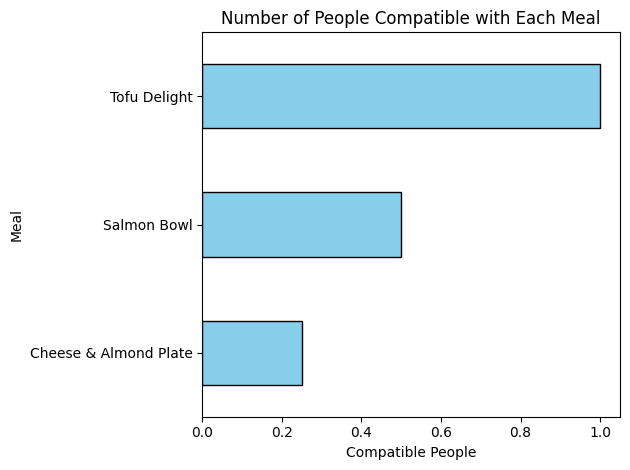

In [15]:
scores = analyzer.score_meals()
scores.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Number of People Compatible with Each Meal")
plt.xlabel("Compatible People")
plt.ylabel("Meal")
plt.tight_layout()
plt.show()

### 🔍 Heatmap of Compatibility Matrix

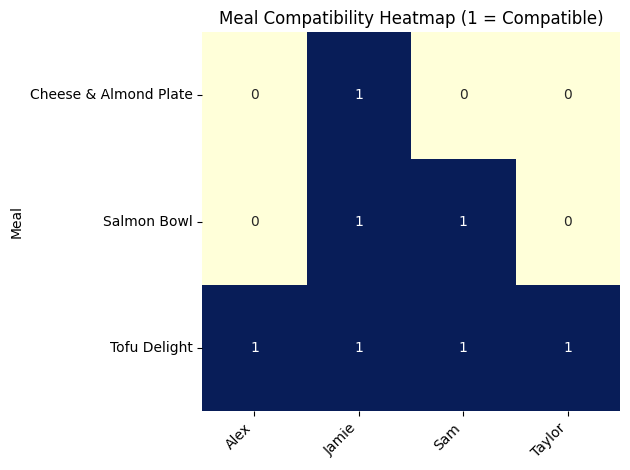

In [16]:
matrix = analyzer.get_compatibility_matrix()
# Convert boolean values to integers, excluding the Meal column
matrix_numeric = matrix.drop('Meal', axis=1).astype(int)
matrix_numeric.index = matrix['Meal']

sns.heatmap(matrix_numeric, annot=True, cmap="YlGnBu", cbar=False)
plt.title("Meal Compatibility Heatmap (1 = Compatible)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 6. Explore Tags by Category

Tags can be grouped by category for filtering or display.

In [17]:

print("\n=== Tags by Category ===")
print("Ethical:", tag_registry.get_tags_by_category("ethical"))
print("Allergen:", tag_registry.get_tags_by_category("allergen"))


=== Tags by Category ===
Ethical: ['VEGAN', 'VEGETARIAN', 'PESCATARIAN', 'MEAT-FREE']
Allergen: ['NUT-FREE', 'DAIRY-FREE', 'EGG-FREE', 'SHELLFISH-FREE', 'FISH-FREE', 'BEEF-FREE', 'GLUTEN-FREE', 'SOY-FREE']


## 7. Natural Language Parsing

This library also allows for the parsing of natural descriptor strings for generating DietaryRestriction objects. It also uses fuzzy logic to handle misspellings (useful if gathering information from forms)

In [18]:
from mealplanner.natural_language_parsing import parse_nl_restriction

In [19]:
samples = [
    "Vegetarian and dairy free",
    "No restrictions",
    "Lactose intollerant",
    "vegan (no milk, egg, meat)",
    "Shellfish and peenut allergy",
    "I can eat everything"
]

parsed = [parse_nl_restriction(s, return_debug=True) for s in samples]

# Display results
print("\n=== Parsing Results ===")
for text in samples:
    restriction = parse_nl_restriction(text)
    print(f"\nInput: {text}")
    print(f"Parsed: {restriction}")


=== Parsing Results ===

Input: Vegetarian and dairy free
Parsed: DietaryRestriction(Excludes: ['DAIRY', 'FISH', 'MEAT', 'SHELLFISH'])

Input: No restrictions
Parsed: None

Input: Lactose intollerant
Parsed: DietaryRestriction(Excludes: ['DAIRY'])

Input: vegan (no milk, egg, meat)
Parsed: DietaryRestriction(Excludes: ['ANIMAL_PRODUCTS', 'DAIRY', 'EGGS', 'MEAT'])

Input: Shellfish and peenut allergy
Parsed: DietaryRestriction(Excludes: ['NUTS', 'SHELLFISH'])

Input: I can eat everything
Parsed: None


## Guest List Analysis

Perhaps the most common use-case of this library is for event-planning, thus one of the most exciting features is the ability to take a simple table of RSVP information and turn that into objects we can easily work with and analyze!

In [20]:
from mealplanner.guest_list_analyzer import GuestListAnalyzer

In [21]:
# Example guest list
guest_data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve'],
    'Dietary Restriction': [
        'Vegan',
        'Vegetarian',
        'No nuts',
        'No shellfish',
        'No restrictions'
    ]
}

# Create analyzer
analyzer = GuestListAnalyzer(pd.DataFrame(guest_data))

# Show restriction summary
print("\n=== Dietary Restriction Summary ===")
summary = analyzer.get_restriction_summary()
for restriction, count in sorted(summary.items(), key=lambda x: (-x[1], x[0])):
    print(f"{restriction}: {count} people")

# Show tag summary
print("\n=== Canonical Tag Summary ===")
tag_summary = analyzer.get_tag_summary()
for tag, count in sorted(tag_summary.items(), key=lambda x: (-x[1], x[0])):
    print(f"{tag}: {count} people")


=== Dietary Restriction Summary ===
DietaryRestriction(Excludes: ['ANIMAL_PRODUCTS']): 1 people
DietaryRestriction(Excludes: ['FISH', 'MEAT', 'SHELLFISH']): 1 people
DietaryRestriction(Excludes: ['NUTS']): 1 people
DietaryRestriction(Excludes: ['SHELLFISH']): 1 people
No restrictions: 1 people

=== Canonical Tag Summary ===
SHELLFISH-FREE: 3 people
VEGETARIAN: 2 people
DAIRY-FREE: 1 people
EGG-FREE: 1 people
FISH-FREE: 1 people
MEAT-FREE: 1 people
NO-RESTRICTIONS: 1 people
NUT-FREE: 1 people
VEGAN: 1 people


In [22]:
# Show restriction matrix with relevant categories
print("\n=== Restriction Matrix (Relevant Categories) ===")
analyzer.get_restriction_matrix(use_emojis=True)


=== Restriction Matrix (Relevant Categories) ===


,Name,ANIMAL_PRODUCTS,FISH,MEAT,NUTS,PLANT_BASED,SHELLFISH
0,Alice,❌,❌,❌,✅,✅,❌
1,Bob,✅,❌,❌,✅,✅,❌
2,Charlie,✅,✅,✅,❌,✅,✅
3,Diana,✅,✅,✅,✅,✅,❌
4,Eve,✅,✅,✅,✅,✅,✅


In [23]:
# Show restriction matrix with specific categories
print("\n=== Restriction Matrix (Selected Categories) ===")
selected_categories = ["MEAT", "DAIRY", "EGGS", "FISH", "SHELLFISH", "NUTS"]
analyzer.get_restriction_matrix(use_emojis=True, categories=selected_categories)


=== Restriction Matrix (Selected Categories) ===


,Name,MEAT,DAIRY,EGGS,FISH,SHELLFISH,NUTS
0,Alice,❌,❌,❌,❌,❌,✅
1,Bob,❌,✅,✅,❌,❌,✅
2,Charlie,✅,✅,✅,✅,✅,❌
3,Diana,✅,✅,✅,✅,❌,✅
4,Eve,✅,✅,✅,✅,✅,✅


In [24]:
# Analyze meal compatibility for the guest list
meals = [
    Meal("Cheese & Almond Plate", [cheese, almond]),
    Meal("Salmon Bowl", [salmon]),
    Meal("Tofu Delight", [tofu])
]
meal_analyzer = analyzer.analyze_meal_compatibility(meals)
print("=== Guest List Meal Compatibility Matrix (With Emojis) ===")
meal_analyzer.get_compatibility_matrix(use_emojis=True)

=== Guest List Meal Compatibility Matrix (With Emojis) ===


,Meal,Alice,Bob,Charlie,Diana,Eve
0,Cheese & Almond Plate,❌,✅,❌,✅,✅
1,Salmon Bowl,❌,❌,✅,✅,✅
2,Tofu Delight,✅,✅,✅,✅,✅
